In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12,8)
data = pd.read_csv('data/bikes_rent.csv')

In [3]:
data.shape

(731, 13)

In [4]:
data.info()
# cnt - y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [5]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,20.310776,7.505091,2.424346,13.820424,20.431653,26.872076,35.328347
atemp,731.0,23.717699,8.148059,3.953480,16.892125,24.336650,30.430100,42.044800
hum,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000


In [7]:
list(data.season.unique())

[1, 2, 3, 4]

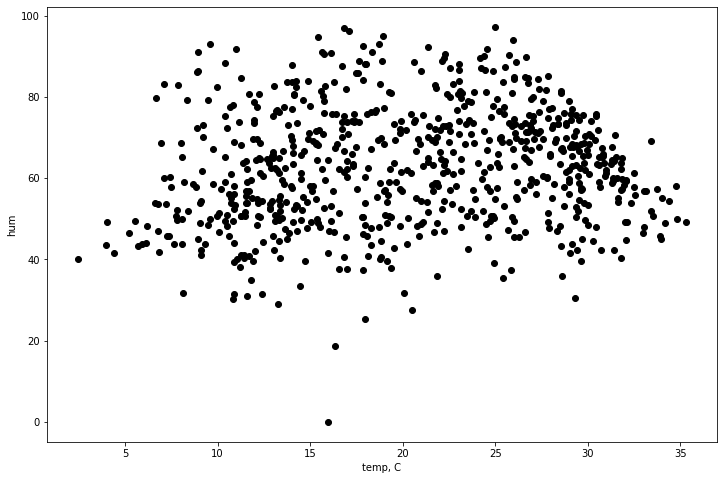

In [8]:
plt.scatter(data['temp'], data['hum'], color = 'black')
plt.xlabel('temp, С')
plt.ylabel('hum')
plt.show()

c:\users\miker\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


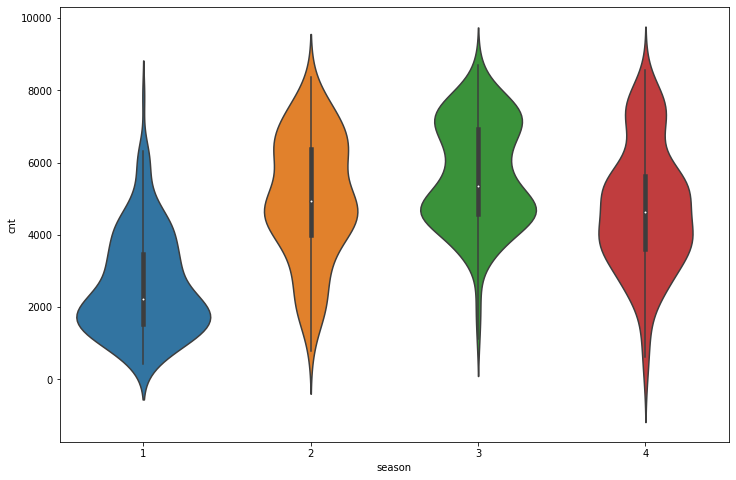

In [9]:
sns.violinplot(data['season'], data['cnt']);
# ІМХО: найбільший попит на велосипеди літом :)

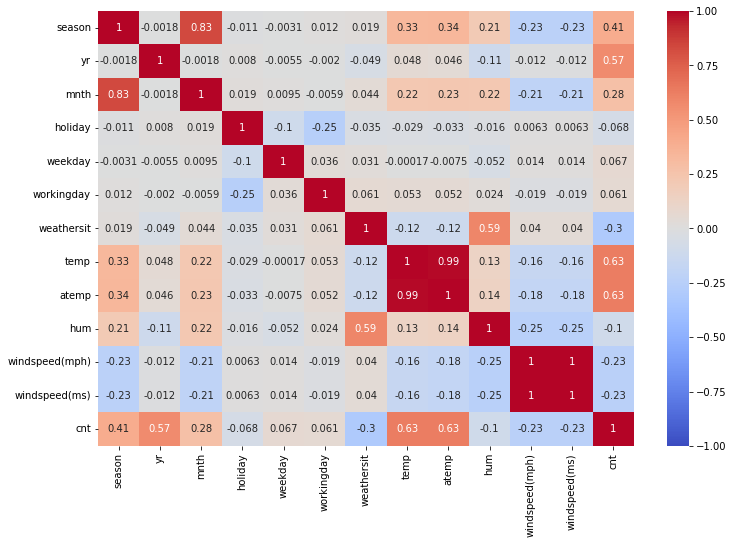

In [10]:
# Температурна карта кореляцій у вибірці
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

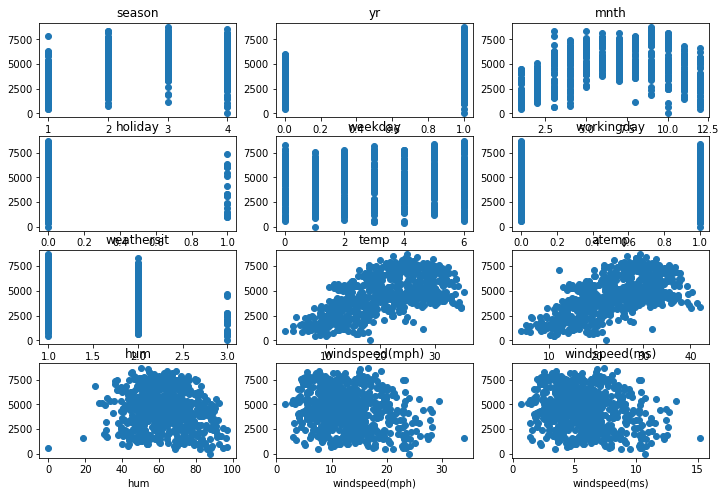

In [11]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i+1)
    plt.xlabel(col)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

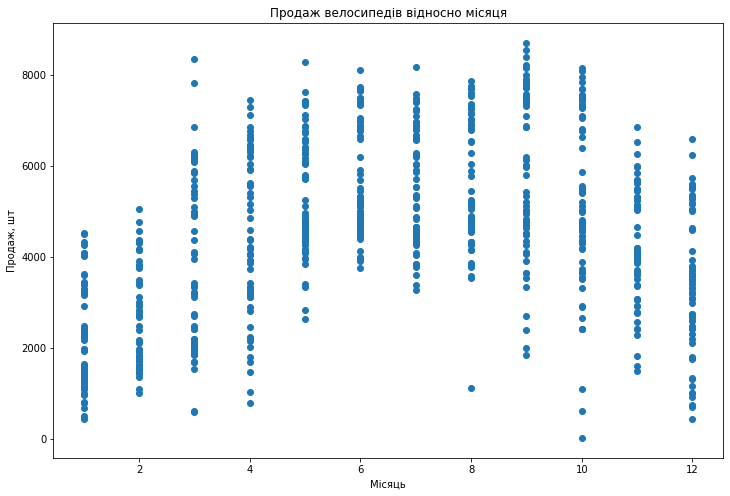

In [12]:
plt.title('Продаж велосипедів відносно місяця')
plt.ylabel('Продаж, шт')
plt.xlabel('Місяць')
plt.scatter(data.mnth, data.cnt);



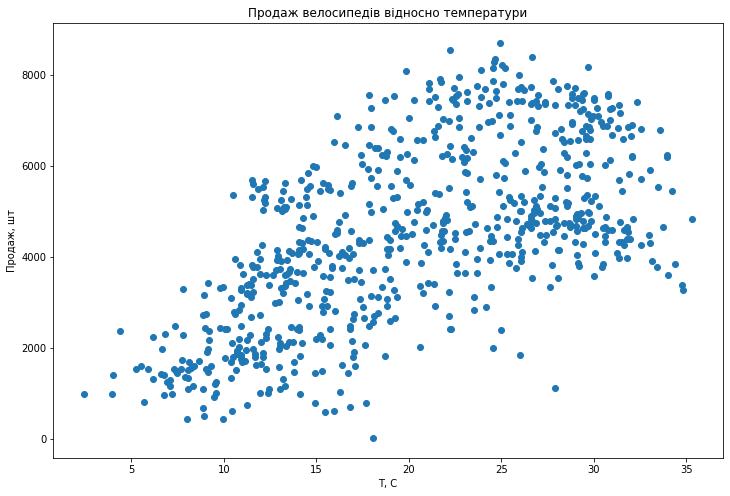

In [13]:
plt.title('Продаж велосипедів відносно температури')
plt.ylabel('Продаж, шт')
plt.xlabel('T, C')
plt.scatter(data.temp, data.cnt);

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error

In [15]:
# Створення моделей регресій
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)

lassoCV = LassoCV(random_state=17)
ridgeCV = RidgeCV()

In [16]:
X,y = data.drop('cnt', axis = 1).values, data.cnt.values

In [17]:
from sklearn.model_selection import train_test_split

# Створення навчальної та перевіркової вибірки
# train_part_size = int(.7 * X.shape[0])

# X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
# y_train, y_valid = y[:train_part_size], y[train_part_size:]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=17)

X_train.shape[0], X_valid.shape[0]

(511, 220)

In [18]:
# Маштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid) 


In [19]:
# Проста лінійна регресія
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
# Середня квадратична помилка на відкладеній вибірці
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1007.1537690759951

In [21]:
# Через мультиколінеарність ваги зросли, треба провести регуляризацію
pd.DataFrame(linreg.coef_, data.columns[:-1], columns = ['coef']).sort_values(by='coef', ascending = False)

,coef
windspeed(mph),3.107546e+13
yr,9.912430e+02
season,6.590099e+02
atemp,6.252596e+02
temp,3.849351e+02
weekday,1.737977e+02
workingday,5.288262e+01
holiday,-5.377478e+01
hum,-2.228980e+02
mnth,-2.338469e+02


In [22]:
def train_validate_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names, forest = False):
    """Вивід MSE та табличних кореляцій для лінійних моделей та regression forest"""
    
    model.fit(X_train_scaled, y_train)
    print(f'MSE={np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled)))}')
    print('Model coefficients:')
    
    coef_name = 'Importance' if forest else 'Coef' 
    coef = model.feature_importances_ if forest else model.coef_
    print(pd.DataFrame(coef, feature_names, columns = [coef_name]).sort_values(by=coef_name, ascending = False))

In [23]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[:-1])

MSE=996.0030259521483
Model coefficients:
                        Coef
yr              9.866100e+02
season          6.419590e+02
atemp           6.043306e+02
temp            4.049048e+02
weekday         1.725811e+02
workingday      4.944039e+01
windspeed(ms)  -5.533303e-08
holiday        -5.531677e+01
mnth           -2.143450e+02
windspeed(mph) -2.167599e+02
hum            -2.241431e+02
weathersit     -2.981433e+02


In [24]:
train_validate_report(lassoCV, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[:-1])

MSE=994.5668195607141
Model coefficients:
                        Coef
yr              9.849435e+02
season          6.322382e+02
atemp           6.048047e+02
temp            4.039575e+02
weekday         1.707130e+02
workingday      4.828631e+01
windspeed(ms)  -5.506157e-08
holiday        -5.456684e+01
mnth           -2.043679e+02
windspeed(mph) -2.148839e+02
hum            -2.225151e+02
weathersit     -2.976840e+02


In [25]:
# без занулення великих ваг
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[:-1])

MSE=996.3206223157094
Model coefficients:
                      Coef
yr              985.577665
season          642.423722
atemp           591.380527
temp            417.744794
weekday         173.031743
workingday       50.133520
holiday         -56.016882
windspeed(mph) -109.135041
windspeed(ms)  -109.135041
mnth           -215.310601
hum            -225.005711
weathersit     -298.023472


In [26]:
train_validate_report(ridgeCV, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[:-1])

MSE=992.4489885203205
Model coefficients:
                      Coef
yr              967.907972
season          599.662368
atemp           537.339927
temp            468.633316
weekday         168.009430
workingday       50.330417
holiday         -57.752203
windspeed(mph) -110.061380
windspeed(ms)  -110.061380
mnth           -175.667518
hum            -224.433801
weathersit     -294.395688


In [27]:
# Random Forest виконав свою роботу найкраще, бо
# 1) Обійшов проблему мультиколінеарності, а, отдже, і надмірне зростання ваг
# 2) Прийняв дані маштабовані та звичайні із однаковою точністю

forest = RandomForestRegressor(random_state=17, n_estimators=100)
train_validate_report(forest, X_train, y_train, X_valid, y_valid, feature_names = data.columns[:-1], 
                      forest=True)

MSE=664.3313099709566
Model coefficients:
                Importance
temp              0.365899
yr                0.272236
atemp             0.127376
season            0.072612
hum               0.055665
mnth              0.031090
weathersit        0.022101
windspeed(mph)    0.018057
windspeed(ms)     0.016714
weekday           0.012829
workingday        0.004046
holiday           0.001373
